## Data Wrangling

#### Introduction
The requirement of current project is to wrangle the tweet archive of Twitter user @dog_rates Twitter data, also known as WeRateDogs, to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations. In this project
#### Gathering Data for this Project
1 The WeRateDogs Twitter archive.Downloading this file manually by clicking the following link: twitter_archive_enhanced.csv 

2.The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3.Using the tweet IDs in the WeRateDogs Twitter archive, quering the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data is written to its own line. Then reading this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

In [101]:
#import major libraries
import pandas as pd
import numpy as np
import requests

In [2]:
# using Request library to Programmatically download the dog image prediction files 
# which is hosted on Udacity server 

url= "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response.content
url_content = response.content
tsv_file = open('image-predictions.tsv', 'wb')

tsv_file.write(url_content)
tsv_file.close()

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'wLsAImfshmRWRuErvMAE5zrLB'
consumer_secret = 'w5dA07eOQxnl2rE7bD6cxkYHDPrpu9h3cLPr61mCBVG1XjmnfQ'
access_token = '81310635-hJsKK1Fy0VIhnLmFWkWlBy79pxjvCvcurdvNz7vwQ'
access_secret = 'DmG62i1LJDgALoSMrbcGF1PRJKMz8HByRJw7N33NbnGwf'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
df_1 = pd.read_csv("twitter-archive-enhanced-2.csv")

tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [102]:
# Making 3 files for each data
archive = pd.read_csv("twitter-archive-enhanced.csv")
image_predict = pd.read_csv("image-predictions.tsv",delimiter='\t')

tweet = pd.read_json('tweet_json.txt',lines=True)


### Assess
Access is the second step, we will access them visually and programmatically, then recording any quality and tidiness issues found. Those issues will be resolved in the third step, cleaning.

In [103]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [104]:
archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [105]:
image_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [106]:
image_predict.jpg_url.duplicated().sum()

66

Here we can see that url of image having duplicates so it's useless to predict same images.

In [107]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [108]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


we can see that rating_numerator column has a very high value of 1776 and rating_denominator has a min of 0.

In [109]:
archive.query('rating_numerator > 100').count().shape[0]

17

In [110]:
archive.query('rating_denominator != 10').count().shape[0]

17

In [111]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [112]:
image_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [113]:
tweet

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2326,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2327,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2328,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [114]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2330 non-null   datetime64[ns, UTC]
 1   id                             2330 non-null   int64              
 2   id_str                         2330 non-null   int64              
 3   full_text                      2330 non-null   object             
 4   truncated                      2330 non-null   bool               
 5   display_text_range             2330 non-null   object             
 6   entities                       2330 non-null   object             
 7   extended_entities              2058 non-null   object             
 8   source                         2330 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [115]:
tweet.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.330000e+03,2.330000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,0.0,0.0,0.0,2330.000000,2330.000000,2195.0,2195.0,2.600000e+01,2.600000e+01
mean,7.419376e+17,7.419376e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,NaN,NaN,NaN,2659.786695,7469.569957,0.0,0.0,8.113972e+17,8.113972e+17
std,6.823123e+16,6.823123e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,NaN,NaN,NaN,4497.088872,11594.237672,0.0,0.0,6.295843e+16,6.295843e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,1.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.782926e+17,6.782926e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,NaN,NaN,NaN,539.250000,1303.000000,0.0,0.0,7.761338e+17,7.761338e+17
50%,7.183508e+17,7.183508e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1244.000000,3248.000000,0.0,0.0,8.281173e+17,8.281173e+17
75%,7.986712e+17,7.986712e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3092.000000,9148.500000,0.0,0.0,8.637581e+17,8.637581e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,76412.000000,154092.000000,0.0,0.0,8.860534e+17,8.860534e+17


#### Quality
#### `Archive` table
- We only want original ratings (no retweets) that have images
- 'tweet_id' is integer not string
- 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
   'retweeted_status_timestamp' columns have maximum null values.
-  'timestamp' is string not a datetime 
-  'rating_numrator' and 'rating_denominator' has some inconsistent values which are uncommen
#### `image_predict` table
- jpg_url columns have duplicated urls

#### `tweet` table
-  'id' is integer not string
-  lots of columns has large null- values.
-  'geo' and 'cordinates' are float not string
-  'retweet_count' and 'favorite_count' is float not integer
- quoted_status_id,quoted_status_id_str is float not integer 

#### Tidiness
#### `Archive` table
- columns doggo,floofer,pupper,puppo columns can be form into single column
- Keep only the necessary columns for analysis, 'tweet_id', 'time_stamp', 'rating_numerator', 'rating_denominator',  'name', 'date', 'time', 'stage'.
#### `image_predict` table
- 
- Keep only the necessary columns, such as 'tweet_id', 'jpg_url', 'img_num'.
- Too many predictins columns
#### `tweet` table
- The tweet table columns are mostly having null values so no need for 3rd table

### Cleaning data
This is the third step of data wrangling, according to the points denoted above quality and tidiness issues will be fixed.

In [116]:
# backup the dataset
archive_clean = archive.copy() 
image_clean = image_predict.copy() 
tweet_df_clean = tweet.copy()

#### archive clean table

#### Define
We only want original ratings (no retweets) that have images by removing rows of which the values in 'retweeted_status_id' column is not null.

#### Code

In [117]:
# remove rows of which the values in 'retweted_status_id' column is not null
archive_clean.drop(archive_clean[archive_clean.retweeted_status_id ==  archive_clean.retweeted_status_id].index, inplace=True)

#### Test

In [118]:
archive_clean.query('retweeted_status_id != retweeted_status_id').sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
353,831309418084069378,NaN,NaN,2017-02-14 01:09:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scooter and his son Montoya. Scooter ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831309418...,12,10,Scooter,None,None,None,None
483,814986499976527872,NaN,NaN,2016-12-31 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. Someone attacked him with a sh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814986499...,11,10,Cooper,None,None,pupper,None
1768,678389028614488064,NaN,NaN,2015-12-20 01:38:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She just learned that her final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678389028...,11,10,Bella,None,None,pupper,None
257,843856843873095681,NaN,NaN,2017-03-20 16:08:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sadie and Daisy. They do all thei...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/843856843...,12,10,Sadie,None,None,None,None


#### Define
converting 'tweet_id'into string,
converting 'timestamp' into a datetime 

#### Code

In [119]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

#### Test

In [120]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

#### Define
columns doggo,floofer,pupper,puppo columns can be form into single column
by merging into a stage column

#### code

In [121]:
stage = pd.melt(archive_clean, id_vars=['tweet_id'], value_vars=['doggo', 'floofer', "pupper", "puppo"])
stage.drop(stage[stage.value == 'None'].index,inplace=True)
stage.rename(columns={'variable':'stage'},inplace=True)
archive_clean = archive_clean.join(stage.set_index('tweet_id'), on='tweet_id')

#### Test

In [122]:
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,value
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None,NaN,NaN


In [123]:
archive_clean.stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

#### Define
lots of columns has maximum null values so we only retain neccessary 
columns.

#### Code

In [124]:
 archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
'source',
'text',
'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls',
'doggo',
'floofer',
'pupper',
'puppo','value'], 1, inplace = True)

#### Test 

In [125]:
 archive_clean.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,12,10,Franklin,NaN


### image_clean table

#### Define
Drop duplicates item of jpg_url

#### Code

In [126]:
image_clean = image_clean.drop_duplicates('jpg_url')

#### Test

In [127]:
sum(image_clean.jpg_url.duplicated())

0

#### Define
No need for 3 prediction columns we can keep only one prediction column
based on odd p1 > p2 > p3 

#### Code

In [128]:
 predictions = [] 
 odds = []
# store the fisrt true algorithm with it's odds
# dog_prediction_confidence function:
# find the first true algorithm and append it to a list with it's odds # if flase, predictions list will have values of NaN
def dog_prediction(data):
  if data.p1_dog == True: 
     predictions.append(data.p1) 
     odds.append(data.p1_conf)
  elif data.p2_dog == True: 
     predictions.append(data.p2) 
     odds.append(data.p2_conf)
  elif data.p3_dog == True: 
     predictions.append(data.p3) 
     odds.append(data.p3_conf)
  else: 
     predictions.append(np.nan) 
     odds.append(0)
image_clean.apply(dog_prediction, axis = 1) 
image_clean['predictions'] = predictions 
image_clean['odds'] = odds

#### Test

In [129]:
image_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,predictions,odds
1225,744995568523612160,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1,Old_English_sheepdog,0.427481,True,Shih-Tzu,0.146336,True,Tibetan_terrier,0.134269,True,Old_English_sheepdog,0.427481
688,684177701129875456,https://pbs.twimg.com/media/CX6v_JOWsAE0beZ.jpg,1,chow,0.334783,True,German_shepherd,0.162647,True,golden_retriever,0.138612,True,chow,0.334783
68,667182792070062081,https://pbs.twimg.com/media/CUJPNjOWsAAZRqP.jpg,1,golden_retriever,0.949892,True,Irish_setter,0.010564,True,Chesapeake_Bay_retriever,0.005821,True,golden_retriever,0.949892
519,676496375194980353,https://pbs.twimg.com/media/CWNl3S9WcAARN34.jpg,1,pug,0.985387,True,Norwegian_elkhound,0.004417,True,French_bulldog,0.003893,True,pug,0.985387
1291,751538714308972544,https://pbs.twimg.com/media/Cm4AeG8XEAAulD2.jpg,2,Labrador_retriever,0.516257,True,golden_retriever,0.210839,True,dingo,0.162022,False,Labrador_retriever,0.516257


#### Define
Convert data type in 'tweet_id' column from integer to string.

#### Code

In [130]:
image_clean.tweet_id = image_clean.tweet_id.astype(str)

#### Test

In [131]:
image_clean.tweet_id.dtype

dtype('O')

#### Define
Droping Unnecesary columns.

#### Code

In [132]:
image_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], 1, inplace = True)

#### Test

In [133]:
image_clean.sample(5)

,tweet_id,jpg_url,img_num,predictions,odds
733,686749460672679938,https://pbs.twimg.com/media/CYfS75fWAAAllde.jpg,1,NaN,0.000000
189,669375718304980992,https://pbs.twimg.com/media/CUoZqaqWcAAA2MQ.jpg,1,Airedale,0.168762
1567,794205286408003585,https://pbs.twimg.com/media/CwWVe_3WEAAHAvx.jpg,3,NaN,0.000000
910,700747788515020802,https://pbs.twimg.com/media/CbmOY41UAAQylmA.jpg,1,Great_Pyrenees,0.481333
297,671390180817915904,https://pbs.twimg.com/media/CVFBzpXVEAAHIOv.jpg,1,NaN,0.000000


### tweet_df_clean table

#### Define
Rename the id column to "tweet_id" to match the other 2 tables.

#### Code

In [134]:
tweet_df_clean.rename(columns = {'id': 'tweet_id'}, inplace = True)

#### Test

In [135]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2330 non-null   datetime64[ns, UTC]
 1   tweet_id                       2330 non-null   int64              
 2   id_str                         2330 non-null   int64              
 3   full_text                      2330 non-null   object             
 4   truncated                      2330 non-null   bool               
 5   display_text_range             2330 non-null   object             
 6   entities                       2330 non-null   object             
 7   extended_entities              2058 non-null   object             
 8   source                         2330 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

#### Define
Convert tweet_id into string

##### Code

In [136]:
tweet_df_clean.tweet_id = tweet_df_clean.tweet_id.astype(str)

#### Test

In [137]:
tweet_df_clean.tweet_id.dtype

dtype('O')

#### Define
Retain necesary columns like tweet_id,retweet_count,favorite_count

#### Code

In [138]:
tweet_df_clean = tweet_df_clean[['tweet_id','retweet_count','favorite_count']]

#### Test

In [139]:
tweet_df_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7561,35752
1,892177421306343426,5603,30885
2,891815181378084864,3713,23232
3,891689557279858688,7739,39043
4,891327558926688256,8340,37277


##### Define
Consolidate all the 3 tables


##### Code

In [140]:
archive_clean = archive_clean.join(tweet_df_clean.set_index('tweet_id'), on='tweet_id')
archive_clean = archive_clean.join(image_clean.set_index('tweet_id'), on='tweet_id')

##### Test

In [141]:
archive_clean.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,predictions,odds
0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,Phineas,NaN,7561.0,35752.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,Tilly,NaN,5603.0,30885.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,12,10,Archie,NaN,3713.0,23232.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,13,10,Darla,NaN,7739.0,39043.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,12,10,Franklin,NaN,8340.0,37277.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712


In [142]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2187 non-null   object             
 1   timestamp           2187 non-null   datetime64[ns, UTC]
 2   rating_numerator    2187 non-null   int64              
 3   rating_denominator  2187 non-null   int64              
 4   name                2187 non-null   object             
 5   stage               356 non-null    object             
 6   retweet_count       2179 non-null   float64            
 7   favorite_count      2179 non-null   float64            
 8   jpg_url             2005 non-null   object             
 9   img_num             2005 non-null   float64            
 10  predictions         1696 non-null   object             
 11  odds                2005 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64

##### Save File


In [143]:
archive_clean.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Data Visualization

#### Investigate the outlier

In [144]:

archive_clean[archive_clean['rating_numerator'] == archive_clean['rating_numerator'].max()]


,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,predictions,odds
979,749981277374128128,2016-07-04 15:00:45+00:00,1776,10,Atticus,NaN,2430.0,5072.0,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,NaN,0.0


In [145]:
archive_clean[archive_clean['rating_denominator'] == archive_clean['rating_denominator'].max()]


,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,predictions,odds
1120,731156023742988288,2016-05-13 16:15:54+00:00,204,170,this,NaN,1240.0,3767.0,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1.0,NaN,0.0


In [146]:
archive_clean[archive_clean['favorite_count'] == archive_clean['favorite_count'].max()]


,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,predictions,odds
1039,744234799360020481,2016-06-18 18:26:18+00:00,13,10,None,doggo,76412.0,154092.0,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,Labrador_retriever,0.825333


In [147]:
archive_clean[archive_clean['favorite_count'] == archive_clean['favorite_count'].min()]


,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,predictions,odds
1295,707983188426153984,2016-03-10 17:35:20+00:00,12,10,None,NaN,2.0,48.0,NaN,NaN,NaN,NaN


In [148]:
archive_clean[archive_clean['retweet_count'] == archive_clean['retweet_count'].max()]


,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,predictions,odds
1039,744234799360020481,2016-06-18 18:26:18+00:00,13,10,None,doggo,76412.0,154092.0,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,Labrador_retriever,0.825333


In [149]:
archive_clean[archive_clean['retweet_count'] == archive_clean['retweet_count'].min()]


,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,predictions,odds
291,838085839343206401,2017-03-04 17:56:49+00:00,15,10,None,NaN,1.0,139.0,NaN,NaN,NaN,NaN


The maximum rating is 1776 and then it has a huge gap to 204. Genrally the numerator and denominator has 10 to 13 rated but 19 observation has shown very high rating. 

In [151]:
 # add a new rating column
archive_clean['rating'] = archive_clean.rating_numerator/archive_clean.rating_denominator

In [154]:
archive_clean.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,predictions,odds,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,13,10,Phineas,NaN,7561.0,35752.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,NaN,0.000000,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,13,10,Tilly,NaN,5603.0,30885.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,12,10,Archie,NaN,3713.0,23232.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,13,10,Darla,NaN,7739.0,39043.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,12,10,Franklin,NaN,8340.0,37277.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,1.2


### Top 10 predictions

Here we are analyzing the top 10 prediction from our second set those dogs breed which got higher predicted.

In [155]:
# we are making 2 columns to from our clean dataset 'predictions' and 'odds'
archive_clean.sort_values('odds', ascending = False)[0:9][['predictions', 'odds']]


,predictions,odds
2204,komondor,0.999956
864,chow,0.999953
1433,Labrador_retriever,0.999885
1870,chow,0.999876
1267,chow,0.999837
483,dalmatian,0.999828
768,chow,0.999823
351,Old_English_sheepdog,0.999715
1722,pug,0.999365


### Stage composition

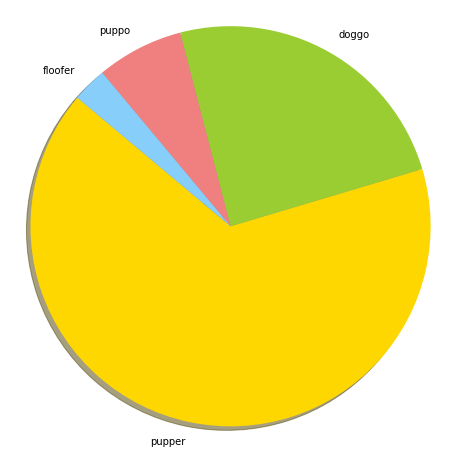

In [156]:
import matplotlib.pyplot as plt

# exclude NA value first and then visualize the stage composition
labels = archive_clean[archive_clean.stage.notnull()].stage.value_counts().index.tolist( )
sizes = archive_clean[archive_clean.stage.notnull()].stage.value_counts().tolist()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'li ghtpink', 'lightcyan']
#cs=cm.Set1(np.arange(40)/40.)
# Plot
plt.figure(figsize=(8, 8))

plt.pie(sizes, labels=labels, colors=colors, shadow=True,startangle=140)
plt.axis('equal') 
plt.savefig('pie.png',dpi=100,bbox_inches='tight')
plt.show()



This pie chart is showing the dog stages distribution according to their Doggo Lingo (or Dog-Speak) terms. The highest one is pupper which means puppies. Least one is footer it’s all dog categories and what the tweets are describing their dogs.

In [157]:
 # firstly, exclude rows in which dog names are missing
# then select the rows of which contain the top 10 rating dog names, but we don' t take the outlier into consideration
# this time
top10_rating = archive_clean.query('name == name').sort_values('rating', ascending = False)[1:10]

#### Boxplot of stage with ratings¶

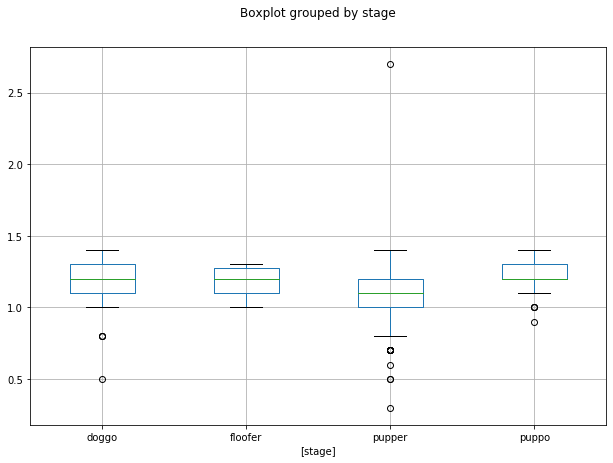

In [158]:
archive_clean[archive_clean['stage'].notnull()].boxplot(column = ['rating'], by = ['stage'], figsize=(10, 7))
plt.title('');
fig = plt.gcf()
fig.savefig('plot_03.png',bbox_inches='tight');

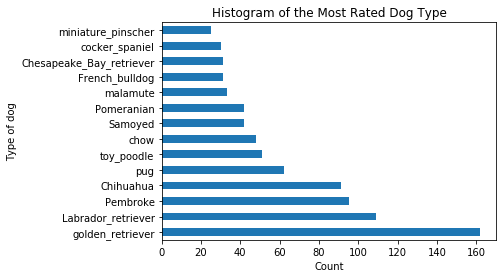

In [159]:
df_dog_type = archive_clean.groupby('predictions').filter(lambda x: len(x) >= 25)

df_dog_type['predictions'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('plot_02.png',bbox_inches='tight');

The most rated dog was golden retriever with more than 160 ratings. Labrador comes next with huge gap of almost 
50 counts and On the opposite end of the scale was the miniature pinscher.

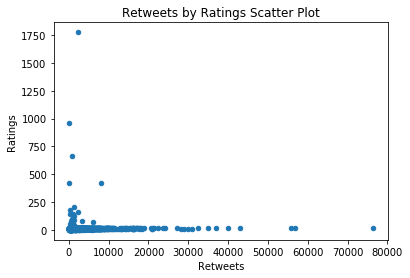

In [160]:
archive_clean.plot(x='retweet_count', y='rating_numerator', kind='scatter')
plt.xlabel('Retweets')
plt.ylabel('Ratings')
plt.title('Retweets by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('plot_04.png',bbox_inches='tight');

Many tweets have been retweeted more than 1000 times some more than even 50000 times. 
However, there is no clear relationship between the ratings and the retweets. 